% 线性回归模型

$$
\hat{y} = w \cdot x + b
$$

% 损失函数（均方误差）

$$
J(w, b) = \frac{1}{2m} \sum_{i=1}^{m} (\hat{y}^{(i)} - y^{(i)})^2
$$

% 梯度下降更新规则

$$
w := w - \alpha \frac{\partial J(w, b)}{\partial w}
$$

$$
b := b - \alpha \frac{\partial J(w, b)}{\partial b}
$$

% 偏导数

$$
\frac{\partial J(w, b)}{\partial w} = \frac{1}{m} \sum_{i=1}^{m} (\hat{y}^{(i)} - y^{(i)}) \cdot x^{(i)}
$$

$$
\frac{\partial J(w, b)}{\partial b} = \frac{1}{m} \sum_{i=1}^{m} (\hat{y}^{(i)} - y^{(i)})
$$


In [ ]:
# !pip install pandas matplotlib numpy tqdm
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import tqdm as tm
from itertools import islice

# 产生数据
# 设置随机种子以确保结果可复现
np.random.seed(0)
# 样本数量
n_samples = 100
# 自变量X（特征），这里我们简单地使用了一个线性递增的序列，并添加了一些随机噪声
X = 2 * np.random.rand(1, n_samples)  # 生成0到2之间的随机数
# 真实参数
true_coef = 2.5
true_intercept = 1.0
# 因变量Y（目标），根据真实参数和自变量X计算得到，并添加一些随机噪声
# + np.random.randn(n_samples, 1) * 0.5
Y = true_coef * X.squeeze() + true_intercept + np.random.randn(1, n_samples) * 0.5
X, Y = X.squeeze(), Y.squeeze()
print(np.shape(X), np.shape(Y))

# print(X[:5], Y, sep="\n")


def J(y_hat, y, m):
    return 1 / (2 * m) * sum((y_hat - y) ** 2)


def hat(w, x, b):
    return w * x + b


def dw(x, y, w, b, m):
    return 1 / m * sum((hat(w, x, b) - y) * x)


def db(x, y, w, b, m):
    return 1 / m * sum((hat(w, x, b) - y))


def batched(iterable, n):
    # batched('ABCDEFG', 3) → ABC DEF G
    if n < 1:
        raise ValueError("n must be at least one")
    iterator = iter(iterable)
    while batch := tuple(islice(iterator, n)):
        yield batch


f, w, b, m = 1, 0, 0, n_samples
a = f
trace = []
turns = 1000
batches = 100
for i in tm.trange(turns):
    a = f / (np.log(i + np.e))
    residual = J(hat(w, X, b), Y, m)
    w, b = w - a * dw(X, Y, w, b, m), b - a * db(X, Y, w, b, m)
    trace.append([i, w, b, a, residual])
for i in batched(trace, batches):
    print(*i[-1])


flag = 1
if flag:
    plt.scatter(X, Y)
    # for i, w, b,a, residual in trace:
    #     if i % 100 == 0:
    #         plt.plot([i for i in np.linspace(0, 2, turns//batches)],
    #                  [w*i+b for i in np.linspace(0, 2, turns//batches)])

    plt.plot(
        [i for i in np.linspace(0, 2, 100)],
        [w * i + b for i in np.linspace(0, 2, 100)],
        color="red",
    )
    plt.show()

% 多项式回归模型

$$
\hat{y} = w_1 \cdot x^2 + w_2 \cdot x + b  \\
p=(w_1,w_2,b)\\
\hat{y}=p\cdot X=(w_1,w_2,b)\cdot \begin{pmatrix}
x^2 \\
x \\
1
\end{pmatrix}
$$

% 损失函数（均方误差）

$$
J(w_1,w_2, b) = \frac{1}{2m} \sum_{i=1}^{m} (\hat{y}^{(i)} - y^{(i)})^2  = \frac{1}{2m} \sum_{i=1}^{m} ((w_1 \cdot x_i^2 + w_2 \cdot x_i +b) - y^{(i)})^2
$$

% 梯度下降更新规则

$$
w_1 := w_1 - \alpha_1 \frac{\partial J(w_1,w_2, b)}{\partial w_1}  \\
w_2 := w_2 - \alpha_2 \frac{\partial J(w_1,w_2, b)}{\partial w_2}  \\
b := b - \alpha_3 \frac{\partial J(w1, w2 ,b)}{\partial b}\\
$$

$$
p = \alpha \cdot p\\
or\\
p=p\cdot
 \begin {bmatrix}
 \alpha_1&0&0\\
 0&\alpha_2&0 \\
 0&0&\alpha_3\\
 \end{bmatrix}
$$

% 偏导数

$$
\frac{\partial J(w_1,w_2, b)}{\partial w_1} = \frac{1}{m} \sum_{i=1}^{m} ((w_1 \cdot x_i^2 + w_2 \cdot x_i +b) - y^{(i)}) \cdot x_i^2  \\
\frac{\partial J(w_1,w_2, b)}{\partial w_2} = \frac{1}{m} \sum_{i=1}^{m} ((w_1 \cdot x_i^2 + w_2 \cdot x_i +b) - y^{(i)}) \cdot x_i \\
\frac{\partial J(w_1,w_2, b)}{\partial b} = \frac{1}{m} \sum_{i=1}^{m} ((w_1 \cdot x_i^2 + w_2 \cdot x_i +b) - y^{(i)}) \\
\Delta = \begin{pmatrix}
\frac{\partial J(w_1,w_2, b)}{\partial w_1}\\
\frac{\partial J(w_1,w_2, b)}{\partial w_2} \\
\frac{\partial J(w_1,w_2, b)}{\partial b}
\end{pmatrix} =\frac{ 1}{m}*\sum{(\hat{y}-y)}\cdot X
$$


In [ ]:
# !pip install pandas matplotlib numpy tqdm
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import tqdm as tm
from itertools import islice

# 产生数据
# 设置随机种子以确保结果可复现
np.random.seed(0)
# 样本数量
n_samples = 100
# 自变量X（特征），这里我们简单地使用了一个线性递增的序列，并添加了一些随机噪声
X = 2 * np.random.rand(n_samples, 1)  # 生成0到2之间的随机数
# 真实参数
true_coef1 = 20
true_coef2 = 7
true_intercept = 10.0
# 因变量Y（目标），根据真实参数和自变量X计算得到，并添加一些随机噪声
# + np.random.randn(n_samples, 1) * 0.5
Y = true_coef1 * X**2 + true_coef2 * X + true_intercept + np.random.randn(n_samples, 1)


# X, Y = X.squeeze(), Y.squeeze()
# print(np.shape(X), np.shape(Y))
def batched(iterable, n):
    # batched('ABCDEFG', 3) → ABC DEF G
    if n < 1:
        raise ValueError("n must be at least one")
    iterator = iter(iterable)
    while batch := tuple(islice(iterator, n)):
        yield batch


def J(y_hat: np.array, y: np.array):
    m = y.shape[0]
    return 1 / (2 * m) * np.sum((y_hat - y.reshape(1, m)) ** 2)


def Hat(p: np.array, x: np.array):
    m = x.shape[0]
    return p.reshape(1, 3).dot(
        np.vstack([(x**2).reshape(1, m), x.reshape(1, m), np.ones((1, m))])
    )


def delta(p: np.array, x: np.array, y: np.array):
    m = y.shape[0]
    return (
        1 / m * (Hat(p, x) - y.reshape(1, m)).dot(np.hstack([x**2, x, np.ones((m, 1))]))
    )


p = np.array([1, 1, 1])  # w1,w2,b
alpha = 1
alpha_copy = alpha
trace = []
turns = 10000
batches = 1000
for i in tm.trange(turns):
    alpha = alpha_copy / (np.log(i + np.e))
    residual = J(Hat(p, X), Y)
    p = p - alpha * delta(p, X, Y)
    trace.append([i, p, residual])

for i in batched(trace, batches):
    print(*i[-1])

flag = 1
p = p.squeeze()
w1, w2, b = p[0], p[1], p[2]
if flag:
    plt.scatter(X, Y)
    plt.plot(
        [i for i in np.linspace(0, 2, 100)],
        [w1 * i**2 + w2 * i + b for i in np.linspace(0, 2, 100)],
        color="red",
    )
    plt.show()

In [ ]:
# todo list
# 1.试用正则化
# 2.多元非线性回归
# 3.逻辑斯谛回归

% 多项式回归模型

$$
\hat{y} = w_1 \cdot x^2 + w_2 \cdot x + b  \\
p=(w_1,w_2,b)\\
\hat{y}=p\cdot X=(w_1,w_2,b)\cdot \begin{pmatrix}
x^2 \\
x \\
1
\end{pmatrix}
$$

% 损失函数（均方误差）

$$
J(w_1,w_2, b) = \frac{1}{2m} \sum_{i=1}^{m} (\hat{y}^{(i)} - y^{(i)})^2  = \frac{1}{2m} \sum_{i=1}^{m} ((w_1 \cdot x_i^2 + w_2 \cdot x_i +b) - y^{(i)})^2
$$

% 梯度下降更新规则

$$
w_1 := w_1 - \alpha_1 \frac{\partial J(w_1,w_2, b)}{\partial w_1}  \\
w_2 := w_2 - \alpha_2 \frac{\partial J(w_1,w_2, b)}{\partial w_2}  \\
b := b - \alpha_3 \frac{\partial J(w1, w2 ,b)}{\partial b}\\
$$

$$
p = \alpha \cdot p\\
or\\
p=p\cdot
 \begin {bmatrix}
 \alpha_1&0&0\\
 0&\alpha_2&0 \\
 0&0&\alpha_3\\
 \end{bmatrix}
$$

% 偏导数

$$
\frac{\partial J(w_1,w_2, b)}{\partial w_1} = \frac{1}{m} \sum_{i=1}^{m} ((w_1 \cdot x_i^2 + w_2 \cdot x_i +b) - y^{(i)}) \cdot x_i^2  \\
\frac{\partial J(w_1,w_2, b)}{\partial w_2} = \frac{1}{m} \sum_{i=1}^{m} ((w_1 \cdot x_i^2 + w_2 \cdot x_i +b) - y^{(i)}) \cdot x_i \\
\frac{\partial J(w_1,w_2, b)}{\partial b} = \frac{1}{m} \sum_{i=1}^{m} ((w_1 \cdot x_i^2 + w_2 \cdot x_i +b) - y^{(i)}) \\
\Delta = \begin{pmatrix}
\frac{\partial J(w_1,w_2, b)}{\partial w_1}\\
\frac{\partial J(w_1,w_2, b)}{\partial w_2} \\
\frac{\partial J(w_1,w_2, b)}{\partial b}
\end{pmatrix} =\frac{ 1}{m}*\sum{(\hat{y}-y)}\cdot X
$$

## L1 正则化 Lasso Regression

least absolute shrinkage and selection operator，又译最小绝对值收敛和选择算子

$$
J(w, b) = \frac{1}{2m} \sum_{i=1}^{m} (\hat{y}^{(i)} - y^{(i)})^2 \\
J_{L1} = J(w,b) + \lambda \|w\|_1
$$

## L2 正则化 Ridge Regression

$$
J(w, b) = \frac{1}{2m} \sum_{i=1}^{m} (\hat{y}^{(i)} - y^{(i)})^2 \\
J = J(w, b)+ \lambda \|w\|_2^2
$$


In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import tqdm as tm
from itertools import islice

# 产生数据
np.random.seed(0)
n_samples = 100
rng = 2
X = 2 * rng * np.random.rand(n_samples, 1) - rng * np.ones(
    (n_samples, 1)
)  # 生成-rng到rng之间的随机数

# 真实参数
true_coef1 = 0
true_coef2 = 0
true_coef3 = -1
true_intercept = 0.5
polynomial = 4

# 因变量Y（目标），根据真实参数和自变量X计算得到，并添加一些随机噪声
Y = (
    true_coef1 * X**3
    + true_coef2 * X**2
    + true_coef3 * X
    + true_intercept
    + np.random.randn(n_samples, 1)
)

fig, axs = plt.subplots(1, 1, figsize=(14, 5))
axs.scatter(X, Y)

turns = 100000
batches = 10000
alpha = 0.01
alpha_copy = alpha


def batched(iterable, n):
    if n < 1:
        raise ValueError("n must be at least one")
    iterator = iter(iterable)
    while batch := tuple(islice(iterator, n)):
        yield batch


def J(y_hat: np.array, y: np.array):
    m = y.shape[0]
    return 1 / (2 * m) * np.sum((y_hat - y.reshape(1, m)) ** 2)


def Hat(p: np.array, x: np.array):
    m = x.shape[0]
    return p.reshape(1, polynomial).dot(
        np.vstack(
            [
                (x**3).reshape(1, m),
                (x**2).reshape(1, m),
                x.reshape(1, m),
                np.ones((1, m)),
            ]
        )
    )


def delta(p: np.array, x: np.array, y: np.array):
    m = y.shape[0]
    return (
        1
        / m
        * (Hat(p, x) - y.reshape(1, m)).dot(np.hstack([x**3, x**2, x, np.ones((m, 1))]))
    )


# 无正则化
p = np.array([1, 1, 1, 1])  # w1, w2, w3, b
trace = []
for i in tm.trange(turns):
    alpha = alpha_copy / (np.log(i + np.e))
    residual = J(Hat(p, X), Y)
    p = p - alpha * delta(p, X, Y)
    trace.append([i, p, residual])

for i in batched(trace, batches):
    print(*i[-1])

p = p.squeeze()
w1, w2, w3, b = p[0], p[1], p[2], p[3]

axs.plot(
    [i for i in np.linspace(-rng, rng, rng * 40)],
    [w1 * i**3 + w2 * i**2 + w3 * i + b for i in np.linspace(-rng, rng, rng * 40)],
    color="red",
)

# L1 Regression
lmd = np.array([10, 10, 0, 0])


def J_with_l1(p: np.array, x: np.array, y: np.array):
    m = y.shape[0]
    return 1 / (2 * m) * np.sum((Hat(p, x) - y.reshape(1, m)) ** 2) + np.sum(
        lmd * np.abs(p)
    )


def delta_with_l1(p: np.array, x: np.array, y: np.array):
    m = y.shape[0]
    gradient = (
        1
        / m
        * (Hat(p, x) - y.reshape(1, m)).dot(np.hstack([x**3, x**2, x, np.ones((m, 1))]))
    )
    regularization = lmd * np.sign(p)
    return gradient + regularization


p = np.array([1, 1, 1, 1])  # w1, w2, w3, bS
trace = []

for i in tm.trange(turns):
    alpha = alpha_copy / (np.log(i + np.e))
    residual = J_with_l1(p, X, Y)
    p = p - alpha * delta_with_l1(p, X, Y)
    trace.append([i, p, residual])

for i in batched(trace, batches):
    print(*i[-1])

p = p.squeeze()
w1, w2, w3, b = p[0], p[1], p[2], p[3]

axs.plot(
    [i for i in np.linspace(-rng, rng, rng * 40)],
    [w1 * i**3 + w2 * i**2 + w3 * i + b for i in np.linspace(-rng, rng, rng * 40)],
    color="green",
)

# L2 Regression
lmd = np.array([10, 10, 0, 0])


def J_with_l2(p: np.array, x: np.array, y: np.array):
    m = y.shape[0]
    return 1 / (2 * m) * np.sum((Hat(p, x) - y.reshape(1, m)) ** 2) + np.sum(
        lmd * np.square(p)
    )


def delta_with_l2(p: np.array, x: np.array, y: np.array):
    m = y.shape[0]
    gradient = (
        1
        / m
        * (Hat(p, x) - y.reshape(1, m)).dot(np.hstack([x**3, x**2, x, np.ones((m, 1))]))
    )
    regularization = 2 * lmd * p
    return gradient + regularization


p = np.array([1, 1, 1, 1])  # w1, w2, w3, bS
trace = []

for i in tm.trange(turns):
    alpha = alpha_copy / (np.log(i + np.e))
    residual = J_with_l2(p, X, Y)
    p = p - alpha * delta_with_l2(p, X, Y)
    trace.append([i, p, residual])

for i in batched(trace, batches):
    print(*i[-1])

p = p.squeeze()
w1, w2, w3, b = p[0], p[1], p[2], p[3]

axs.plot(
    [i for i in np.linspace(-rng, rng, rng * 40)],
    [w1 * i**3 + w2 * i**2 + w3 * i + b for i in np.linspace(-rng, rng, rng * 40)],
    color="black",
)


plt.show()

## Puzzle 1

为什么 正则化公式给出的 lambda 作用于所有非 0 次项， 这不是等于对所有的自变量都做同样规模的限制了吗？
而且似乎实际效果也并不理想， 倒是对特定阶变量设置 lambda = [10 10 1 0] 效果更好

## 数学基础

### 矩阵求导法则简介

矩阵求导是多变量微积分中的一个重要部分，广泛应用于机器学习、最优化、统计等领域。以下是一些常见的矩阵求导法则和基本概念的简介。

#### 1. 标量对向量的求导

如果有一个标量函数 \( f \) ，它是向量 \( \mathbf{x} \) 的函数，记作 \( f(\mathbf{x}) \)，则对 \( \mathbf{x} \) 的求导结果是一个向量：

$$
\frac{\partial f}{\partial \mathbf{x}} = \left[ \frac{\partial f}{\partial x_1}, \frac{\partial f}{\partial x_2}, \ldots, \frac{\partial f}{\partial x_n} \right]^T
$$

#### 2. 标量对矩阵的求导

如果有一个标量函数 \( f \)，它是矩阵 \( \mathbf{X} \) 的函数，记作 \( f(\mathbf{X}) \)，则对 \( \mathbf{X} \) 的求导结果是一个矩阵：

$$
\frac{\partial f}{\partial \mathbf{X}} = \left[ \frac{\partial f}{\partial X_{ij}} \right]
$$

#### 3. 向量对向量的求导

如果有一个向量值函数 \( \mathbf{f} \)，它是向量 \( \mathbf{x} \) 的函数，记作 \( \mathbf{f}(\mathbf{x}) \)，则对 \( \mathbf{x} \) 的求导结果是一个雅可比矩阵（Jacobian Matrix）：

$$
\frac{\partial \mathbf{f}}{\partial \mathbf{x}} = \begin{bmatrix}
\frac{\partial f_1}{\partial x_1} & \frac{\partial f_1}{\partial x_2} & \cdots & \frac{\partial f_1}{\partial x_n} \\
\frac{\partial f_2}{\partial x_1} & \frac{\partial f_2}{\partial x_2} & \cdots & \frac{\partial f_2}{\partial x_n} \\
\vdots & \vdots & \ddots & \vdots \\
\frac{\partial f_m}{\partial x_1} & \frac{\partial f_m}{\partial x_2} & \cdots & \frac{\partial f_m}{\partial x_n}
\end{bmatrix}
$$

#### 4. 常见矩阵求导法则

以下是一些常见的矩阵求导法则：

##### (a) 线性函数

对于线性函数 \( f(\mathbf{x}) = \mathbf{a}^T \mathbf{x} \)，其导数为：

$$
\frac{\partial f}{\partial \mathbf{x}} = \mathbf{a}
$$

##### (b) 二次型函数

对于二次型函数 \( f(\mathbf{x}) = \mathbf{x}^T \mathbf{A} \mathbf{x} \)，其中 \( \mathbf{A} \) 是一个对称矩阵，其导数为：

$$
\frac{\partial f}{\partial \mathbf{x}} = 2\mathbf{A}\mathbf{x}
$$

##### (c) 矩阵对矩阵的导数

如果 \( \mathbf{X} \) 和 \( \mathbf{Y} \) 是两个矩阵，且 \( \mathbf{X} \) 和 \( \mathbf{Y} \) 的形状允许相乘，则对矩阵乘积的求导法则如下：

$$
\frac{\partial (\mathbf{AX})}{\partial \mathbf{X}} = \mathbf{A}^T, \quad \frac{\partial (\mathbf{XB})}{\partial \mathbf{X}} = \mathbf{B}^T
$$

其中 \( \mathbf{A} \) 和 \( \mathbf{B} \) 是常数矩阵。

#### 5. 链式法则

对于复合函数，矩阵求导也可以使用链式法则。例如，如果 \( \mathbf{z} = g(\mathbf{y}) \) 且 \( \mathbf{y} = h(\mathbf{x}) \)，则：

$$
\frac{\partial \mathbf{z}}{\partial \mathbf{x}} = \frac{\partial \mathbf{z}}{\partial \mathbf{y}} \frac{\partial \mathbf{y}}{\partial \mathbf{x}}
$$

### 示例

假设我们有一个简单的二次型函数 \( f(\mathbf{x}) = \mathbf{x}^T \mathbf{A} \mathbf{x} \)，其中 \( \mathbf{A} \) 是一个对称矩阵。我们可以根据上述法则求导：

$$
\frac{\partial f}{\partial \mathbf{x}} = 2\mathbf{A}\mathbf{x}
$$

### 总结

矩阵求导在多变量微积分中非常重要，尤其在机器学习和统计中。掌握这些基本法则和技巧可以帮助你在处理复杂的矩阵运算时更加得心应手。

## Logistic Regression

逻辑斯谛回归旨在解决分类问题，特别是二分类问题。与线性回归不同，逻辑斯谛回归的目标是预测某个事件发生的概率。例如，给定一个病人的特征，预测他是否患有某种疾病。
% $\sigma$函数

$$
\sigma(z)=\frac{1}{1+e^{-z}}，
其中z为线性回归模型的输出
$$

$$
P(Y=1|X) = \frac{1}{1 + e^{-(\beta_0 + \beta_1 X_1 + \beta_2 X_2 + \cdots + \beta_p X_p)}}
$$

% 逻辑函数

$$
\text{Logit}(P) = \ln \left( \frac{P}{1-P} \right) = \beta_0 + \beta_1 X_1 + \beta_2 X_2 + \cdots + \beta_p X_p
$$

% 反向表示

$$
P = \frac{e^{\beta_0 + \beta_1 X_1 + \beta_2 X_2 + \cdots + \beta_p X_p}}{1 + e^{\beta_0 + \beta_1 X_1 + \beta_2 X_2 + \cdots + \beta_p X_p}}
$$

假设 f(x)为边界函数，有

$$
\hat{y} = \frac{1}{1+e^{-f(x)}}
$$

对于损失函数仍有

$$
J(w,x)= \frac{1}{2m}\cdot \sum_{i=1}^{m}{(\frac{1}{1+e^{-f(x)}}}-y_{0|1})^2
$$

直接上手分析较为复杂的情况，也就是 f(x)为多项式的情况有:

$$
f(X)=w^T\cdot X
$$

$$
\frac {\partial J}{\partial w} =\frac{1}{m}\cdot \sum_{i=1}^{m}(\frac{1}{1+e^{-w^Tx}}-y_{0|1})\cdot \frac {\partial {\sigma}(w^Tx)}{\partial w}
$$

对于$\sigma$函数的求导有：

$$
\frac{\partial \sigma (z)}{\partial z} = \frac{e^z}{(1+e^{-z})^2}=\sigma(z)^2 \cdot e^{-z} = \sigma(z) \cdot (1-\sigma(z) )
$$

所以

$$
\frac {\partial {\sigma}(w^Tx)}{\partial w}=\frac {\partial{\sigma}(w^Tx)}{\partial w^Tx} \cdot \frac{\partial w^Tx}{\partial {w}} = \sigma(w^Tx)\cdot (1-\sigma(w^Tx))\cdot x^T
$$

因此，存在对$J$对$w$的导数:

$$
\frac {\partial J}{\partial w} =\frac{1}{m}\cdot \sum_{i=1}^{m}(\sigma(w^Tx)-y_{0|1})\cdot \frac {\partial {\sigma}(w^Tx)}{\partial w} = \frac{1}{m}\cdot \sum_{i=1}^{m}(\sigma(w^Tx)-y_{0|1})\cdot \sigma(w^Tx)\cdot (1-\sigma(w^Tx))\cdot x^T
$$


In [ ]:
import numpy as np
import matplotlib.pyplot as plt
import tqdm as tm
from itertools import islice

# 产生数据
np.random.seed(0)
n_samples = 100
rng = 2
X = 2 * rng * np.random.rand(n_samples, 1) - rng * np.ones(
    (n_samples, 1)
)  # 生成-rng到rng之间的随机数

# 真实参数
true_coef1 = 0
true_coef2 = 0
true_coef3 = 1
true_intercept = -1
polynomial = 4

# 计算线性组合
linear_combination = (
    true_coef1 * X**3 + true_coef2 * X**2 + true_coef3 * X + true_intercept
)


def sigmoid(z):
    return 1 / (1 + np.exp(-np.clip(z, -250, 250)))


# 应用逻辑函数
probabilities = sigmoid(linear_combination)

# 生成二分类的因变量Y（目标），根据概率生成0或1
Y = (probabilities >= 0.5).astype(int).astype(float)

# 可视化数据

fig, axs = plt.subplots(1, 1, figsize=(14, 5))
axs.scatter(X, Y, c=Y, cmap="viridis", edgecolors="k")
axs.set_xlabel("X")
axs.set_ylabel("Y")
axs.set_title("Generated Data for Logistic Regression")
# plt.show()

turns = 10000
batches = 10000
alpha = 0.01
alpha_copy = alpha


def batched(iterable, n):
    if n < 1:
        raise ValueError("n must be at least one")
    iterator = iter(iterable)
    while batch := tuple(islice(iterator, n)):
        yield batch


def J(y_hat: np.array, y: np.array):
    m = y.shape[0]
    return 1 / (2 * m) * np.sum(np.square(y_hat - y.reshape(1, m)))


def Jpxy(p: np.array, x: np.array, y: np.array):
    m = y.shape[0]
    return 1 / (2 * m) * np.sum(np.square(Hat(p, X) - y.reshape(1, m)))


def Hat(p: np.array, x: np.array):
    m = x.shape[0]
    return p.reshape(1, polynomial).dot(
        np.vstack(
            [
                (x**3).reshape(1, m),
                (x**2).reshape(1, m),
                x.reshape(1, m),
                np.ones((1, m)),
            ]
        )
    )


def delta(p: np.array, x: np.array, y: np.array):
    m = y.shape[0]
    X_ = np.vstack(
        [(x**3).reshape(1, m), (x**2).reshape(1, m), x.reshape(1, m), np.ones((1, m))]
    )  # 4,100
    temp = (Hat(p, x) - y.reshape(1, m)) * Hat(p, x)
    temp = temp * (np.ones((1, m)) - Hat(p, x))
    temp = temp.dot(X_.T)
    return 1 / m * temp


# 无正则化
p = np.array([1, 1, 1, 1])  # w1, w2, w3, b
trace = []

for i in tm.trange(turns):
    alpha = alpha_copy / (np.log(i + np.e))
    residual = J(Hat(p, X), Y)
    p = p - alpha * delta(p, X, Y)
    trace.append([i, p, residual])

for i in batched(trace, batches):
    print(*i[-1])

p = p.squeeze()
w1, w2, w3, b = p[0], p[1], p[2], p[3]

axs.plot(
    [i for i in np.linspace(-rng, rng, rng * 40)],
    [
        1 / np.e ** (-1 * (w1 * i**3 + w2 * i**2 + w3 * i + b))
        for i in np.linspace(-rng, rng, rng * 40)
    ],
    color="red",
)

plt.show()

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
import tqdm as tm
from itertools import islice

# 产生数据
np.random.seed(0)
n_samples = 100
rng = 2
X = rng * np.random.rand(n_samples, 1)  # 生成0到rng之间的随机数

# 真实参数
true_coef1 = 0
true_coef2 = 0
true_coef3 = 1
true_intercept = -1
polynomial = 2

# 计算线性组合
linear_combination = (
    true_coef1 * X**3 + true_coef2 * X**2 + true_coef3 * X + true_intercept
)

# 定义数值限制范围
cliprange = 500


def sigmoid(z):
    return 1 / (1 + np.exp(-np.clip(z, -cliprange, cliprange)))


# 应用逻辑函数
probabilities = sigmoid(linear_combination)

# 生成二分类的因变量Y（目标），根据概率生成0或1
Y = (probabilities >= 0.5).astype(int).astype(float)

# 可视化数据
fig, axs = plt.subplots(1, 1, figsize=(14, 5))
axs.scatter(X, Y, c=Y, cmap="viridis", edgecolors="k")
axs.set_xlabel("X")
axs.set_ylabel("Y")
axs.set_title("Generated Data for Logistic Regression")
# plt.show()

turns = 1000000
batches = 1000
alpha = 0.01
alpha_copy = alpha


def batched(iterable, n):
    if n < 1:
        raise ValueError("n must be at least one")
    iterator = iter(iterable)
    while batch := tuple(islice(iterator, n)):
        yield batch


def J(y_hat: np.array, y: np.array):
    m = y.shape[0]
    return 1 / (2 * m) * np.sum(np.square(y_hat - y.reshape(1, m)))


def Jpxy(p: np.array, x: np.array, y: np.array):
    m = y.shape[0]
    return 1 / (2 * m) * np.sum(np.square(Hat(p, X) - y.reshape(1, m)))


def Hat(p: np.array, x: np.array):
    m = x.shape[0]
    return sigmoid(
        p.reshape(1, polynomial).dot(
            np.vstack(
                [np.clip(x.reshape(1, m), -cliprange, cliprange), np.ones((1, m))]
            )
        )
    )


def delta(p: np.array, x: np.array, y: np.array):
    m = y.shape[0]
    X_ = np.vstack(
        [np.clip(x.reshape(1, m), -cliprange, cliprange), np.ones((1, m))]
    )  # 2,100
    temp = Hat(p, x) - y.reshape(1, m)
    temp = temp * Hat(p, x) * (1 - Hat(p, x))
    temp = temp.dot(X_.T)
    return 1 / m * temp


p = np.array([1, 1])  # w3, b
trace = []

for i in tm.trange(turns):
    # alpha = alpha_copy / (np.log(i + np.e))
    residual = J(Hat(p, X), Y)
    p = p - alpha * delta(p, X, Y)
    trace.append([i, p, residual])

for i in batched(trace, batches):
    print(*i[-1])

p = p.squeeze()
w3, b = p[0], p[1]

axs.plot(
    [i for i in np.linspace(0, rng, rng * 40)],
    [sigmoid(w3 * i + b) for i in np.linspace(0, rng, rng * 40)],
    color="red",
)

plt.show()

100%|██████████| 1000000/1000000 [01:09<00:00, 14381.08it/s]


999 [[-1.08362431  0.24533139  0.29622814]] 0.08241199566431004
1999 [[-1.5206838   0.66436143  0.38434921]] 0.0785683659346699
2999 [[-1.83951469  1.08708098  0.31944177]] 0.07571484787098298
3999 [[-2.11841022  1.50383381  0.21435825]] 0.07308886507668755
4999 [[-2.38178238  1.90983964  0.10210636]] 0.07062048313354828
5999 [[-2.63751918  2.30304973 -0.00686752]] 0.06830126402184798
6999 [[-2.88778902  2.68288076 -0.10983985]] 0.06612585455288011
7999 [[-3.13290854  3.04945413 -0.20663331]] 0.06408727430195339
8999 [[-3.37271925  3.40319607 -0.29777718]] 0.062177503590864734
9999 [[-3.60702733  3.74465248 -0.38390804]] 0.060388139293819185
10999 [[-3.83571546  4.07440826 -0.46560381]] 0.05871079557075775
11999 [[-4.05875252  4.39305208 -0.5433548 ]] 0.05713733860163437
12999 [[-4.27617768  4.70116024 -0.61757165]] 0.05566002163378565
13999 [[-4.48808174  4.99928865 -0.68859987]] 0.05427155763106129
14999 [[-4.69459158  5.28796875 -0.75673301]] 0.052965151767869305
15999 [[-4.89585816

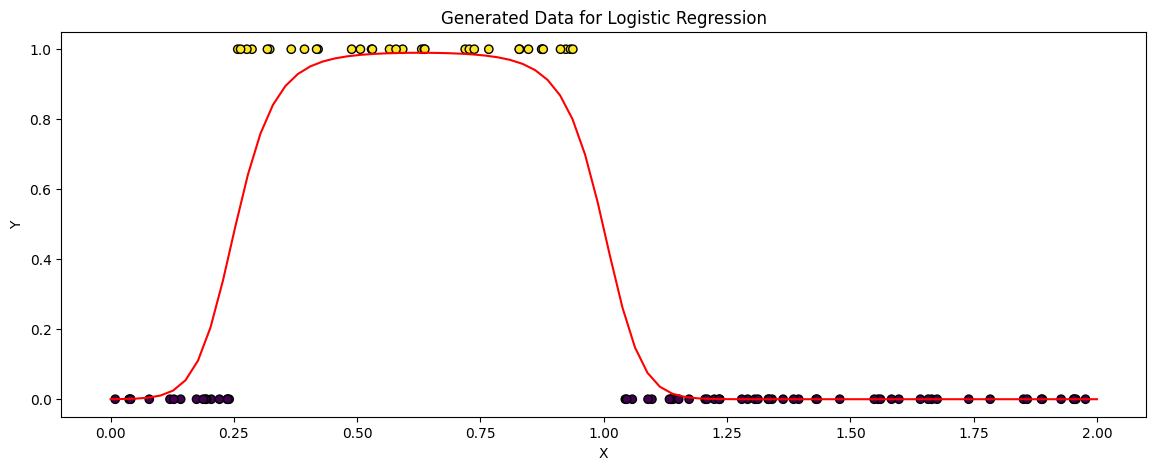

In [115]:
import numpy as np
import matplotlib.pyplot as plt
import tqdm as tm
from itertools import islice

# 产生数据
np.random.seed(0)
n_samples = 100
rng = 2
X = rng * np.random.rand(n_samples, 1)  # 生成0到rng之间的随机数

# 真实参数
true_coef1 = 0
true_coef2 = -4
true_coef3 = 5
true_intercept = -1
polynomial = 3

# 计算线性组合
linear_combination = (
    true_coef1 * X**3 + true_coef2 * X**2 + true_coef3 * X + true_intercept
)

# 定义数值限制范围
cliprange = 500


def sigmoid(z):
    return 1 / (1 + np.exp(-np.clip(z, -cliprange, cliprange)))


# 应用逻辑函数
probabilities = sigmoid(linear_combination)

# 生成二分类的因变量Y（目标），根据概率生成0或1
Y = (probabilities >= 0.5).astype(int).astype(float)

# 可视化数据
fig, axs = plt.subplots(1, 1, figsize=(14, 5))
axs.scatter(X, Y, c=Y, cmap="viridis", edgecolors="k")
axs.set_xlabel("X")
axs.set_ylabel("Y")
axs.set_title("Generated Data for Logistic Regression")
# plt.show()

turns = 1000000
batches = 1000
alpha = 0.1
alpha_copy = alpha


def batched(iterable, n):
    if n < 1:
        raise ValueError("n must be at least one")
    iterator = iter(iterable)
    while batch := tuple(islice(iterator, n)):
        yield batch


def J(y_hat: np.array, y: np.array):
    m = y.shape[0]
    return 1 / (2 * m) * np.sum(np.square(y_hat - y.reshape(1, m)))


def Jpxy(p: np.array, x: np.array, y: np.array):
    m = y.shape[0]
    return 1 / (2 * m) * np.sum(np.square(Hat(p, X) - y.reshape(1, m)))


def Hat(p: np.array, x: np.array):
    m = x.shape[0]
    return sigmoid(
        p.reshape(1, polynomial).dot(
            np.vstack(
                [
                    np.clip((x**2).reshape(1, m), -cliprange, cliprange),
                    np.clip(x.reshape(1, m), -cliprange, cliprange),
                    np.ones((1, m)),
                ]
            )
        )
    )


def delta(p: np.array, x: np.array, y: np.array):
    m = y.shape[0]
    X_ = np.vstack(
        [
            np.clip((x**2).reshape(1, m), -cliprange, cliprange),
            np.clip(x.reshape(1, m), -cliprange, cliprange),
            np.ones((1, m)),
        ]
    )  # 2,100
    temp = Hat(p, x) - y.reshape(1, m)
    temp = temp * Hat(p, x) * (1 - Hat(p, x))
    temp = temp.dot(X_.T)
    return 1 / m * temp


p = np.array([1, 1, 1])  # w3, b
trace = []

for i in tm.trange(turns):
    # alpha = alpha_copy / (np.log(i + np.e))
    residual = J(Hat(p, X), Y)
    p = p - alpha * delta(p, X, Y)
    trace.append([i, p, residual])

for i in batched(trace, batches):
    print(*i[-1])

p = p.squeeze()
w2, w3, b = p[0], p[1], p[2]

axs.plot(
    [i for i in np.linspace(0, rng, rng * 40)],
    [sigmoid(w2 * i**2 + w3 * i + b) for i in np.linspace(0, rng, rng * 40)],
    color="red",
)

plt.show()

In [7]:
import numpy as np

# 生成模拟数据
np.random.seed(42)
num_samples = 100
num_features = 10
num_classes = 3

X = np.random.rand(num_samples, num_features)  # 输入特征
y = np.random.randint(num_classes, size=num_samples)  # 类别标签

# 初始化模型参数
W = np.random.randn(num_features, num_classes)  # 权重
b = np.zeros(num_classes)  # 偏置


# Softmax函数
def softmax(logits):
    exp_logits = np.exp(logits - np.max(logits, axis=1, keepdims=True))
    return exp_logits / np.sum(exp_logits, axis=1, keepdims=True)


# 交叉熵损失函数
def cross_entropy_loss(probs, y_true):
    num_samples = y_true.shape[0]
    log_likelihood = -np.log(probs[np.arange(num_samples), y_true])
    loss = np.sum(log_likelihood) / num_samples
    return loss


# 模型训练
def train(X, y, W, b, learning_rate=0.01, num_epochs=100):
    num_samples = X.shape[0]

    for epoch in range(num_epochs):
        # 计算线性输出
        logits = np.dot(X, W) + b
        # 计算Softmax输出
        probs = softmax(logits)
        # 计算损失
        loss = cross_entropy_loss(probs, y)

        # 计算梯度
        dlogits = probs
        dlogits[np.arange(num_samples), y] -= 1
        dlogits /= num_samples

        dW = np.dot(X.T, dlogits)
        db = np.sum(dlogits, axis=0)

        # 参数更新
        W -= learning_rate * dW
        b -= learning_rate * db

        if epoch % 10 == 0:
            print(f"Epoch {epoch}, Loss: {loss}")

    return W, b


# 训练模型
W, b = train(X, y, W, b, learning_rate=0.01, num_epochs=200)


# 预测
def predict(X, W, b):
    logits = np.dot(X, W) + b
    probs = softmax(logits)
    return np.argmax(probs, axis=1)


# 预测结果
predictions = predict(X, W, b)
accuracy = np.mean(predictions == y)
print(f"Accuracy: {accuracy}")

Epoch 0, Loss: 2.966453688876423
Epoch 10, Loss: 2.7584489444126477
Epoch 20, Loss: 2.5638188617639215
Epoch 30, Loss: 2.384515811651064
Epoch 40, Loss: 2.2220779190398017
Epoch 50, Loss: 2.077414751430774
Epoch 60, Loss: 1.950691140929097
Epoch 70, Loss: 1.841341649154434
Epoch 80, Loss: 1.7482009890775845
Epoch 90, Loss: 1.6697007456363098
Epoch 100, Loss: 1.6040750264946106
Epoch 110, Loss: 1.5495328844880638
Epoch 120, Loss: 1.5043788467082349
Epoch 130, Loss: 1.4670821793129065
Epoch 140, Loss: 1.4363057960637615
Epoch 150, Loss: 1.410908222769133
Epoch 160, Loss: 1.3899301682673024
Epoch 170, Loss: 1.372573950861603
Epoch 180, Loss: 1.3581809262511342
Epoch 190, Loss: 1.3462097495191552
Accuracy: 0.29
